##  Assignment 7. Task 3. Hill Climbing Algorithm

In this task we are going to implement the basic version of the hill climbing algorithm to solve the travelling salesman problem for 48 cities. Then we add the random restart to the algorithm to increase the chances of finding the global optimal solution. To recap the logic of the algorithm, you could watch the short videos: hill climbing - https://www.youtube.com/watch?v=kOFBnKDGtJM; with random restart - https://www.youtube.com/watch?v=lFjH05v3T54

In [1]:
from math import sqrt
import random
from IPython.display import Image

In [2]:
# read file on input and returns the list of coordinates [[x1, y1], [..],...]
def read_file(file_name):
    f = open(file_name, "r")
    print('The number of cities are: ' + f.readline())
    coords = []
    print("The coordinates are: ")
    for line in f:
        x, y = line.split()
        coords.append([float(x), float(y)])
        print(x + ", " + y)
    return coords

In [3]:
# The function calculates the euclidean distance between cities 
# Returns a matrix of distances between cities
def distance_matrix(coordinates):
    distances = []
    for [x, y] in coordinates:
        cur_distances = []
        for [x1, y1] in coordinates:
            dist = sqrt((x - x1)**2 + (y - y1)**2)
            cur_distances.append(dist)
        distances.append(cur_distances)
    return distances

In [4]:
# Sum up the total length of the tour based on the distance matrix
def path_length(distances, path):
    length = 0
    n_cities = len(list(path))
    for i in range(n_cities):
        # for the last city, the distance to the first city should be added
        j = (i+1) % n_cities
        city_i = path[i]
        city_j = path[j]
        length += distances[city_i][city_j]
    return length

# Generate random valid path, that goes through each city exactly once
def init_random_path(path_length):
    path = list(range(path_length))
    random.shuffle(path)
    return path

# Return the list of all paths, where 2 cities of the input path were swapped 
def get_neighbours(path):
    neighbours = []
    for i in range(len(path)):
        for j in range(i + 1, len(path)):
            neighbour = path.copy()
            neighbour[i] = path[j]
            neighbour[j] = path[i]
            neighbours.append(neighbour)
    return neighbours

# Find the most optimal path among the neighbours
# Returns best path and its length
def best_solution(neighbours):
    best_length = objective_function(neighbours[0])
    best_neighbour = neighbours[0]
    for neighbour in neighbours:
        current_length = objective_function(neighbour)
        if current_length < best_length:
            best_length = current_length
            best_neighbour = neighbour
    return best_neighbour, best_length

In [5]:
# Start with the random path
# Investgate the neighbours of the current path, update solution if you find the more optimal one
# Return the best path and the corresponding length
def hill_climbing():
    cur_path = init_function()
    cur_length = objective_function(cur_path)
    neighbours = get_neighbours(cur_path)
    best_neighbour, best_length = best_solution(neighbours)

    # if any of the neighbour path represents more optimal solution, continue
    while best_length < cur_length:
        cur_path = best_neighbour
        cur_length = best_length
        neighbours = get_neighbours(cur_path)
        best_neighbour, best_length = best_solution(neighbours)        
    return cur_path, cur_length

# Restart hill_climbing the required number of times (defined in iterations variable);
# Return the best result
def random_restart(iterations):
    global_best_path, global_best_length = hill_climbing()
    for i in range(iterations):
        cur_path, cur_length = hill_climbing()
        if (cur_length < global_best_length):
            global_best_length = cur_length
            global_best_path = cur_path
    return global_best_path, global_best_length
    

In [7]:
file_name = '/Users/mariya/Documents/Advanced_ML/Assignment7/input_coordinates_48.txt'
coordinates = read_file(file_name)
distances = distance_matrix(coordinates)

# You may use lambda functions below to separate the logic of the algorithm from the problem domain 
# (the particular instance of the coordinates and distances)
init_function = lambda: init_random_path(len(coordinates))
objective_function = lambda path: path_length(distances, path)

best_path, best_length = hill_climbing()
print("best path is: ", best_path)
print("min length is: ", best_length)
print()
print("Hill Climbing with random restart")
iterations = 1000
best_path_random_restart, best_length_random_restart = random_restart(iterations)
print("best path is: ", best_path)
print("min length is: ", best_length)

The number of cities are: 48

The coordinates are: 
6734, 1453
2233, 10
5530, 1424
401, 841
3082, 1644
7608, 4458
7573, 3716
7265, 1268
6898, 1885
1112, 2049
5468, 2606
5989, 2873
4706, 2674
4612, 2035
6347, 2683
6107, 669
7611, 5184
7462, 3590
7732, 4723
5900, 3561
4483, 3369
6101, 1110
5199, 2182
1633, 2809
4307, 2322
675, 1006
7555, 4819
7541, 3981
3177, 756
7352, 4506
7545, 2801
3245, 3305
6426, 3173
4608, 1198
23, 2216
7248, 3779
7762, 4595
7392, 2244
3484, 2829
6271, 2135
4985, 140
1916, 1569
7280, 4899
7509, 3239
10, 2676
6807, 2993
5185, 3258
3023, 1942
best path is:  [30, 45, 11, 46, 12, 24, 38, 31, 20, 42, 16, 26, 18, 36, 6, 17, 43, 33, 28, 1, 3, 25, 41, 47, 4, 13, 22, 10, 39, 8, 0, 15, 40, 9, 34, 44, 23, 19, 29, 5, 27, 35, 32, 14, 2, 21, 7, 37]
min length is:  51746.19272566751

Hill Climbing with random restart
best path is:  [30, 45, 11, 46, 12, 24, 38, 31, 20, 42, 16, 26, 18, 36, 6, 17, 43, 33, 28, 1, 3, 25, 41, 47, 4, 13, 22, 10, 39, 8, 0, 15, 40, 9, 34, 44, 23, 19, 29, 

Online solver Concord provides the solution for the traveling salesman problem. You could try it at https://neos-server.org/neos/solvers/co:concorde/TSP.html. The input file with coordinates has already the correct format for Concord. The optimal solution has length 33522.00, for the cities visited in the following sequence:

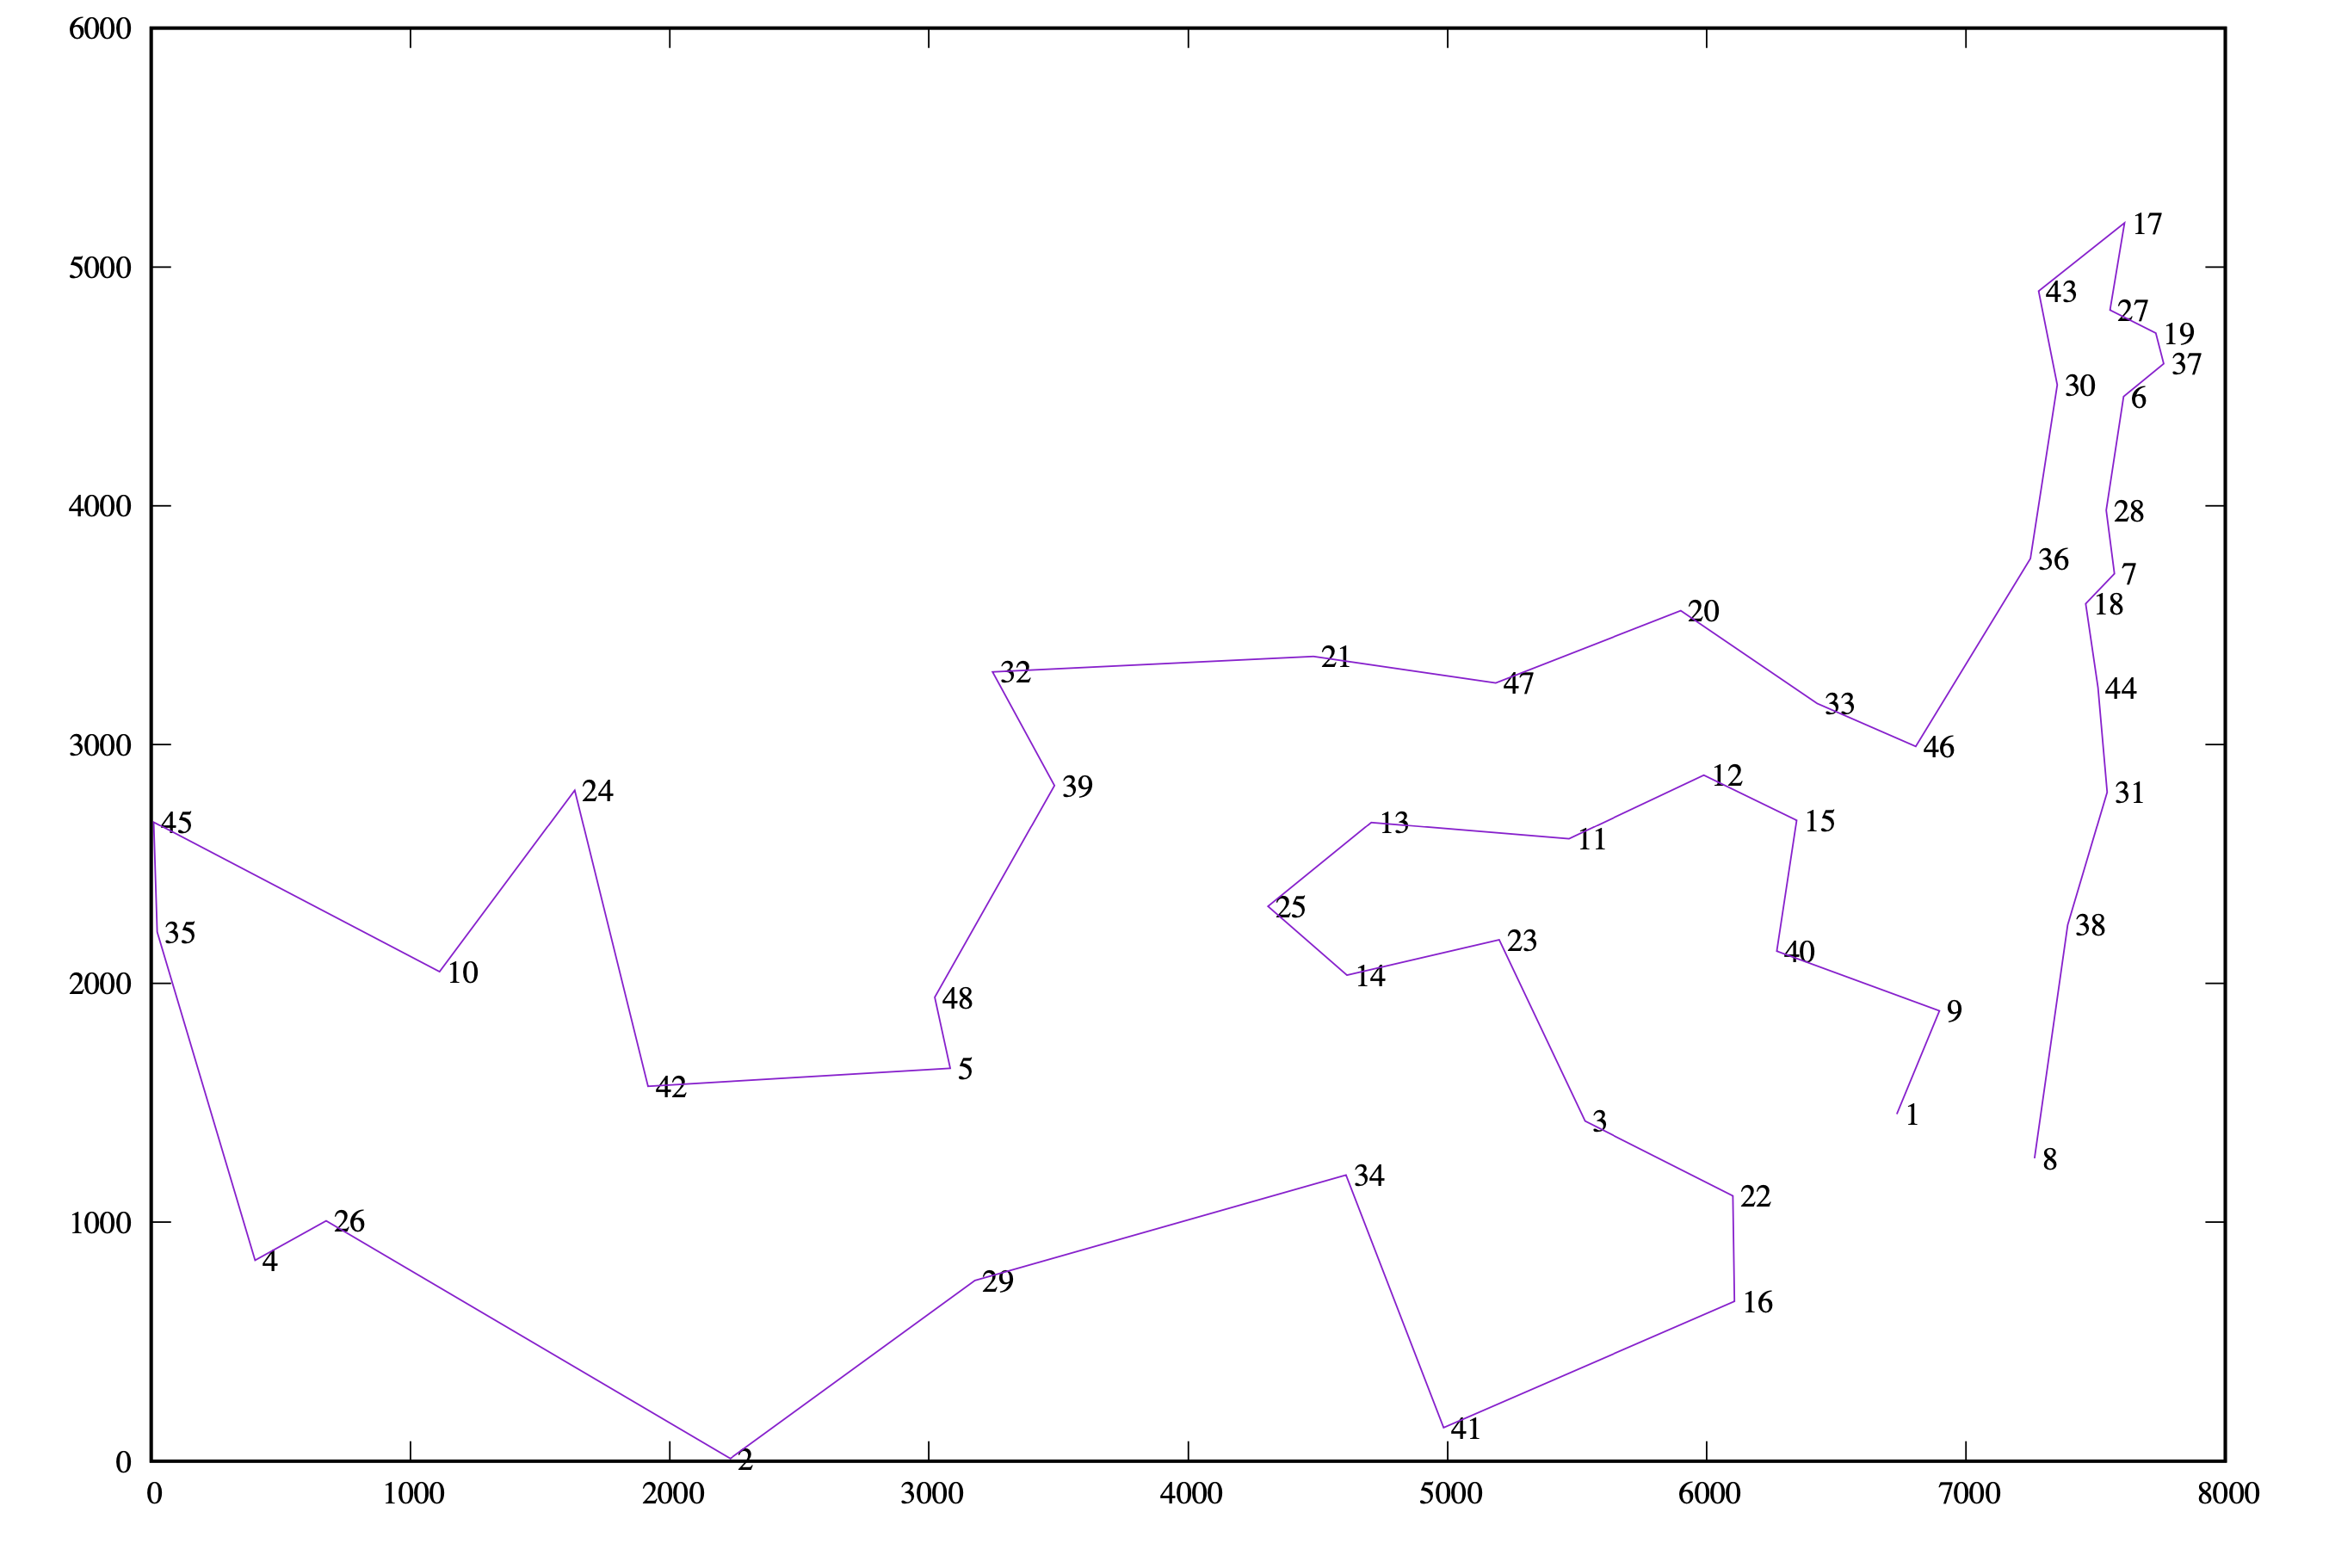

In [8]:
Image('/Users/Zarbali/Desktop/Concord_solution.png')

Optional task: Draw the plots of your solutions and compare, how close they are to the Concord solution.